<a href="https://colab.research.google.com/github/m607stars/Machine-Learning-Algorithms/blob/master/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries and data

In [1]:
#We import the necessary libraries 

import sys
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt  


from sklearn.cluster import KMeans    #To implement KMeans
from math import sqrt
from sklearn.datasets.samples_generator import make_blobs   #To generate random datapoints 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


# Making Random Dataset 

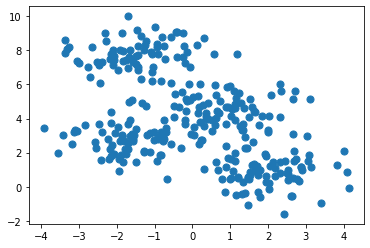

In [22]:
#We give the centroids as 4, and no. of datapoints as 300
#We also take the standard deviation of clusters as 0.9 so that the datapoints are not easily separable
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.90, random_state=0)    
plt.scatter(X[:, 0], X[:, 1], s=50)                  #We plot the datapoints 

# Finding Optimum Clusters 
We need to first find the optimum clusters as we can't always guess how many classes would be there in dataset. So we do this by finding the inertia of the KMeans algorithm applied by setting the value of groups from 1 to 20. For larger datasets, one can even do the calculations for as large as 50 different classes. After getting the inertia of all the different number of clusters, we  then see the maximum percent change for all the values starting from 1. 

In [ ]:
inertia_values = []    #Initialize an empty list 

#For finding the inertia of KMeans for different number of clusters (here 20)
for i in range (1,20):
  m = KMeans(n_clusters=i)     #store  KMeans in m
  m.fit(X)                     #Fit the data
  inertia_values.append(m.inertia_)   #Append the inertia into the list inertia_values

#print Inertia_values
inertia_values

[3079.6849468163646,
 1429.3077585140034,
 795.3236124003193,
 454.3778700005048,
 401.4544706029594,
 351.7148170504679,
 309.23746248987425,
 279.85245512702625,
 241.49375625904983,
 219.6856269579497,
 200.67444954725406,
 184.25231038542174,
 171.5930017567952,
 158.8476669434603,
 149.0759406083931,
 140.5961919422749,
 132.12385577599244,
 121.74902338340388,
 116.71731896922452]

In [ ]:
#We Convert the inertia_values into dataframe for plottinf it easily
df = pd.DataFrame({'Cluster':range(1,20),'inertia_values':inertia_values})  
df

,Cluster,inertia_values
0,1,3079.684947
1,2,1429.307759
2,3,795.323612
3,4,454.377870
4,5,401.454471
5,6,351.714817
6,7,309.237462
7,8,279.852455
8,9,241.493756
9,10,219.685627


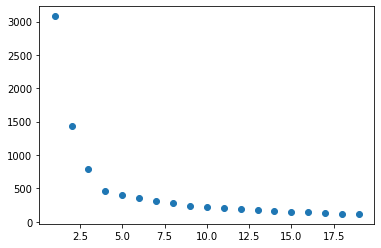

In [ ]:
#We plot the inertia_values
plt.scatter(df['Cluster'],df['inertia_values'])

We have optimum 4 clusters since the maximum difference in the slope of the curve occurs at x=4 i.e. 4 clusters. We can interpret this as the max change of the first derivative of the curve i.e. the second derivative must be zero

# K-Means Implementation using sklearn library

In [23]:
#We now implement the K-means Clustering algorithm for 4 clusters as obtained from the previous cell 

model = KMeans(n_clusters=4)   #store  KMeans in model
model.fit(X)                   #Fit the data
y_pred = model.predict(X)      #Predict the Y-values

y_pred

array([2, 1, 0, 1, 3, 3, 2, 0, 1, 1, 2, 1, 0, 1, 3, 0, 0, 3, 2, 2, 3, 3,
       0, 2, 2, 2, 3, 0, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 3, 0, 2, 1, 0,
       2, 2, 1, 2, 1, 3, 2, 3, 1, 3, 3, 2, 1, 2, 1, 3, 1, 0, 1, 2, 2, 2,
       1, 3, 1, 2, 0, 0, 1, 2, 2, 1, 2, 0, 3, 1, 3, 0, 3, 3, 1, 0, 3, 0,
       1, 1, 0, 3, 1, 2, 2, 0, 3, 3, 0, 2, 1, 3, 1, 3, 0, 3, 3, 0, 1, 0,
       2, 2, 3, 1, 3, 0, 1, 3, 3, 0, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2, 1, 2,
       2, 3, 1, 2, 2, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0,
       3, 2, 1, 2, 3, 0, 1, 0, 0, 3, 0, 2, 2, 0, 3, 0, 0, 1, 3, 0, 2, 1,
       3, 3, 0, 2, 3, 0, 2, 2, 0, 0, 0, 0, 3, 1, 2, 2, 0, 0, 2, 2, 2, 0,
       2, 1, 0, 2, 3, 2, 0, 2, 2, 1, 0, 1, 0, 2, 0, 0, 1, 2, 2, 3, 3, 0,
       1, 3, 3, 2, 3, 2, 2, 1, 1, 0, 0, 1, 0, 3, 2, 0, 3, 2, 1, 2, 3, 0,
       3, 1, 1, 1, 1, 2, 2, 0, 0, 2, 3, 0, 2, 2, 0, 3, 3, 1, 0, 0, 2, 3,
       1, 2, 0, 1, 0, 3, 3, 2, 2, 3, 3, 3, 3, 0, 1, 1, 3, 3, 0, 3, 3, 3,
       1, 0, 1, 0, 3, 3, 1, 1, 1, 3, 3, 0, 1, 2], d

In [24]:
#Count the number of y_predicted values for each class
pd.Series(y_pred).value_counts()  

2    78
3    75
0    74
1    73
dtype: int64

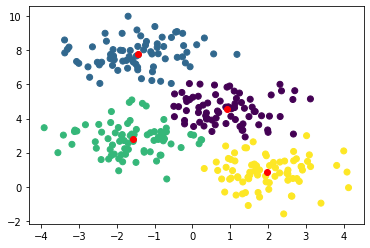

In [26]:
#Plot the predicted classes and centroids of clusters 
plt.scatter(X[:, 0], X[:, 1], c=y_pred)   #plotting the data points
centers = model.cluster_centers_          #storing the centroids in centers
plt.scatter(centers[:, 0], centers[:, 1],color='red')   #plotting centres

# Algorithm from scratch

The algorithm of k-means clustering is based on the simple premise of Euclidean distances. Initially, we need to take the no. of clusters and the dataframe from the user. 

Step 1 - Randomly assign 'k' centroids i.e. k = no. of clusters

Step 2 - Calculate the Euclidean distance between data-points and each of the  centroids. Assign the centroid having minimum distance to the datapoint

Step 3 - Calcuate mean variance

Step 4 - The mean of each of the clusters are the new centorids. Repeat step 2 with these new centroids. 

Step 5 - Repeat the above procedure until the mean variance of the newly assigned centroids is less than the previous mean variance. 

Note- ALthough the algorithm does not fit that nicely as optimization is not done. The main motive was the implementation of the algo giving considerable results.

In [3]:
# We make a pandas dataframe out of the randomly generated dataset and name it as df.
# The columns are named x and y based on their respective coordinates.
# Another column 'clusters' is introduced indicating the cluster the datapoint belongs to

df = pd.DataFrame(X, columns = ['x', 'y']) 
df['Clusters']=np.nan
df

,x,y,Clusters
0,0.227652,2.755707,NaN
1,-1.496359,7.196705,NaN
2,1.244684,5.497535,NaN
3,-0.903797,7.804642,NaN
4,0.879393,2.389981,NaN
...,...,...,...
295,1.932913,1.920866,NaN
296,2.749879,1.638817,NaN
297,0.170350,4.652000,NaN
298,1.178346,7.768928,NaN


In [15]:
# We define a function to randomly geenrate 'k' centroids from the dataframe 'df'
# This function returns centroids dataframe which only contains the co-ordinates of the centroids

def clustering(df,k):
  centroids = df.sample(n=k)   #Select any k random points from the dataset
  centroids = centroids.drop(columns='Clusters')    
  return centroids

In [16]:
# This function asssigns each of data point to any one of the 'k' centroids

def assigning_clusters(centroids,df):
  for i in range(len(df)):         
    sum = []
    for j in range(len(centroids)):           
      sum.append((df.iat[i,0]-centroids.iat[j,0])**2 + (df.iat[i,1]-centroids.iat[j,1])**2)        #Calculating distance from each of the centroids
    df.iat[i, 2] = sum.index(min(sum))   #Assigning the point to that centroid from which the distance is minimum
  return (df)

In [17]:
# variance function is used to calculate the mean variance of all the datapoints

def variance(df,centroids):
  varaince_mean = sys.maxsize         #We initialize the varaince_mean with the maximum integer
  # We now calulcate the variance for each of the datapoint. It is the square of the Euclidean distance between datapoint and its assigned centroid
  for i in range(len(df)):            
    varaince_mean = varaince_mean + (df.iat[i,0]-centroids.iat[int(df.iat[i,2]),0])**2 + (df.iat[i,1]-centroids.iat[int(df.iat[i,2]),1])**2
  varaince_mean = varaince_mean/len(df)    #We caluclate the mean
  return varaince_mean

In [18]:
# Here, we integrate all the above defined functions into our final k_means

def k_means(df,k):
  centroids = clustering(df,k)                 #Randomly create the centroids
  df = assigning_clusters(centroids,df)        #Assign the centroids
  current_variance = variance(df,centroids)    #We caluclate the current varaince using the randomly assigned centroids
  previous_variance = sys.maxsize              #for the first iteration, we just initialize the previous_variance to maximum integer
  # In k means we have to iterate i.e. take the mean of the clusters until the variance starts to increase.
  #  Hence we have compared the previous variance with the current one.
  while (current_variance < previous_variance):
    previous_variance = variance(df,centroids)
    df = assigning_clusters(centroids,df)      #We form the clusters of datapoints
    means = df.groupby('Clusters')             #We group the datapoints by clusters
    centroids = means.mean()                   #The mean of the clusters so formed are the new centroids
    current_variance = variance(df,centroids)  #The variance is calculated.
  return centroids,df

In [19]:
# We call the k_means function and print the dataframe with the updated clusters
centers,dataframe = k_means(df,4)
print(dataframe)

            x         y  Clusters
0    0.227652  2.755707       1.0
1   -1.496359  7.196705       3.0
2    1.244684  5.497535       2.0
3   -0.903797  7.804642       3.0
4    0.879393  2.389981       1.0
..        ...       ...       ...
295  1.932913  1.920866       2.0
296  2.749879  1.638817       2.0
297  0.170350  4.652000       3.0
298  1.178346  7.768928       2.0
299 -1.923734  2.665562       0.0

[300 rows x 3 columns]


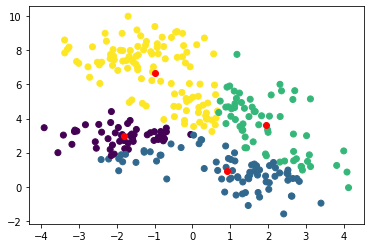

In [21]:
#Plot the predicted classes and centroids of clusters
plt.scatter(df['x'], df['y'],c=df['Clusters'])   #plotting the data points
plt.scatter(centers['x'], centers['y'],color='red')   #plotting centres